In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset


C:\Users\roger\AppData\Local\Temp\ipykernel_17880\2816518301.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [17]:
import pandas as pd

# Step 1: Load properly using comma delimiter
path = r'D:\A deep understanding of Deep Learning (with python)\FFN\mnist_train_small.csv'
df = pd.read_csv(path, header=None, delimiter=';')

# Step 2: Check full shape
print("Full DataFrame shape:", df.shape)  # Should be (20000, 785)

# Step 3: Split label and features
labels = df.iloc[:, 0].values
data = df.iloc[:, 1:].values

print("labels.shape:", labels.shape)      # (20000,)
print("data.shape:", data.shape)          # (20000, 784)


Full DataFrame shape: (20001, 785)
labels.shape: (20001,)
data.shape: (20001, 784)


In [18]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import torch

def makeTheDataset(N, doubleTheData=False):
    # Get labels and data
    labels = dataFull[:N, 0]
    data = dataFull[:N, 1:]

    # Normalize data (pixel values between 0 and 1)
    dataNorm = data / np.max(data)

    # Optionally double the data
    if doubleTheData:
        dataNorm = np.concatenate((dataNorm, dataNorm), axis=0)
        labels = np.concatenate((labels, labels), axis=0)

    # Convert to tensors
    dataT = torch.tensor(dataNorm).float()
    labelsT = torch.tensor(labels).long()  # Use long for classification labels

    # Split into train/test
    train_data, test_data, train_labels, test_labels = train_test_split(
        dataT, labelsT, train_size=0.8, stratify=labelsT
    )

    # Create TensorDatasets
    train_ds = TensorDataset(train_data, train_labels)
    test_ds = TensorDataset(test_data, test_labels)

    # Create DataLoaders
    batchsize = 20
    train_loader = DataLoader(train_ds, batch_size=batchsize, shuffle=True, drop_last=True)
    test_loader = DataLoader(test_ds, batch_size=test_ds.tensors[0].shape[0])

    return train_loader, test_loader


In [20]:

dataFull = df.values

r, t = makeTheDataset(200, False)
print("Without doubling:")
print("Train shape:", r.dataset.tensors[0].shape)
print("Test shape :", t.dataset.tensors[0].shape)

r, t = makeTheDataset(200, True)
print("\nWith doubling:")
print("Train shape:", r.dataset.tensors[0].shape)
print("Test shape :", t.dataset.tensors[0].shape)


Without doubling:
Train shape: torch.Size([160, 784])
Test shape : torch.Size([40, 784])

With doubling:
Train shape: torch.Size([320, 784])
Test shape : torch.Size([80, 784])


### Create the DL Model

In [21]:
def createTheMNISTNet():
    class mnistNet(nn.Module):
        def __init__(self):
            super().__init__()

            self.input=nn.Linear(784,64)

            self.fc1=nn.Linear(64,32)
            self.fc2=nn.Linear(32,32)

            self.output=nn.Linear(32,10)

            def forward(self,x):
                x=F.relu(self.input(x))
                x=F.relu(self.fc1(x))
                x=F.relu(self.fc2(x))
                return self.output(x)
            net=mnistNet()
            lossfun=nn.CrossEntropyLoss()
            optimizer=torch.optim.SGD(net.parameters(),lr=.01)
            return net,lossfun,optimizer

In [25]:
def funtion2trainTheModel():

    numepochs=50
    net,lossfun,optimizer=createTheMNISTNet()

    losses=torch.zeros(numepochs)
    trainAcc=[]
    testAcc=[]

    for epochi in range(numepochs):

        batchAcc=[]
        batchLoss=[]

        for X,y in train_loader:
            yHat=net(X)
            loss=lossfun(yHat,y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchLoss.append(loss.item())

            matches=torch.argmax(yHat,axis=1)==y
            matchesNumeric=matches.float()
            accuracyPct=100*torch.mean(matchesNumeric)
            batchAcc.append(accuracyPct)

        trainAcc.append(np.mean(batchAcc))

        losses[epochi]=np.mean(batchLoss)
        X,y=next(iter(test_loader))
        with torch.no_grad():
            yHat=net(X)
        testAcc.append(100*torch.mean(torch.argmax(yHat,axis=1)==y).float())

    return trainAcc,testAcc,losses,net

### Run the model once to confirm that it works

NameError: name 'losses' is not defined

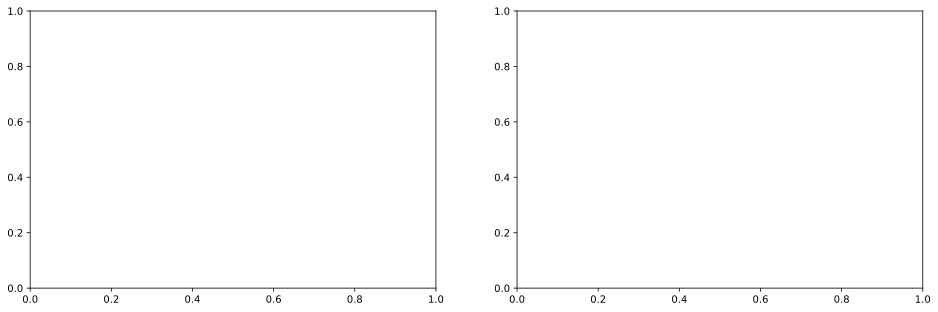

In [26]:
# Assume:
# - train_loader, test_loader = makeTheDataset(...)
# - trainAcc, testAcc, losses, net = function2trainTheModel()

import matplotlib.pyplot as plt

# Create subplots for loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# --- Loss Plot ---
ax[0].plot(losses, 'r^-', label='Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss over Epochs')
ax[0].legend()

# --- Accuracy Plot ---
ax[1].plot(trainAcc, 'bo-', label='Train Accuracy')
ax[1].plot(testAcc, 'gs-', label='Test Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title('Train vs Test Accuracy')
ax[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()
